In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns

import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

import random
from tqdm import tqdm

from scipy.cluster import hierarchy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
sc = StandardScaler()
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import datasets

In [4]:
#use dataset provided by Sci-kit learn module
print(datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
Boston = pd.DataFrame(datasets.load_boston().data)
Boston.columns = datasets.load_boston().feature_names
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#get the target variable
Boston_target = datasets.load_boston().target
print(Boston_target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
x = Boston # Features
y = Boston_target  # Target

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
# hyper-parameter space
param_grid_RF = {
    'n_estimators' : [10,20,50,100,200,500,1000],
    'max_features' : [0.6,0.8,"auto","sqrt"],
    'max_depth' : [2,4,5,6]
}

# build random forest model
rf_model = RandomForestRegressor(random_state=42,n_jobs=-1)
# gridsearch for the best hyper-parameter
gs_rf = GridSearchCV(rf_model, param_grid=param_grid_RF, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# fit dataset
gs_rf.fit(x_train, y_train)

regressor = RandomForestRegressor(random_state=42, n_estimators=gs_rf.best_params_['n_estimators'], max_depth=gs_rf.best_params_['max_depth'], 
                                  max_features= gs_rf.best_params_['max_features']) 
regressor.fit(x_train, y_train)
    
y_pred = regressor.predict(x_test)
    
prediction_dict = pd.DataFrame(columns = ['real','predicted'])
prediction_dict.real = y_test
prediction_dict.predicted = y_pred

# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
       
#feature importance
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                         index=x_train.columns,columns=['importance']).sort_values('importance',ascending = False)   


RMSE:
 2.975


In [12]:
prediction_dict

,real,predicted
0,23.6,23.169517
1,32.4,30.909518
2,13.6,16.320642
3,22.8,23.240991
4,16.1,16.826339
...,...,...
97,17.9,12.928840
98,9.6,12.821176
99,17.2,13.994026
100,22.5,21.035881


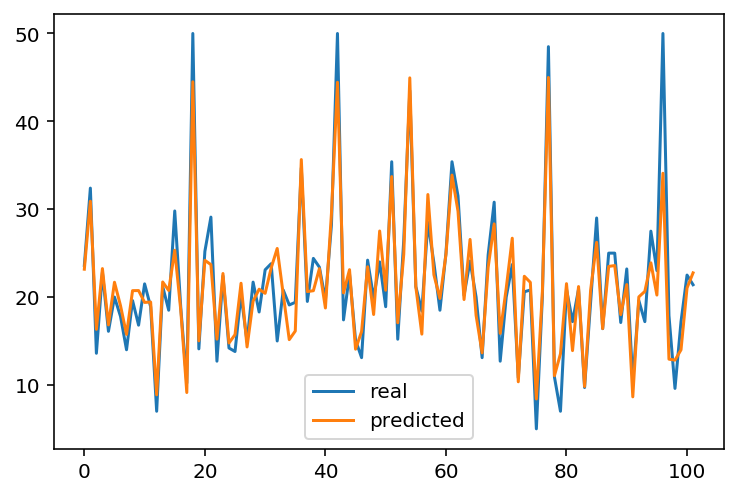

In [14]:
prediction_dict.plot()

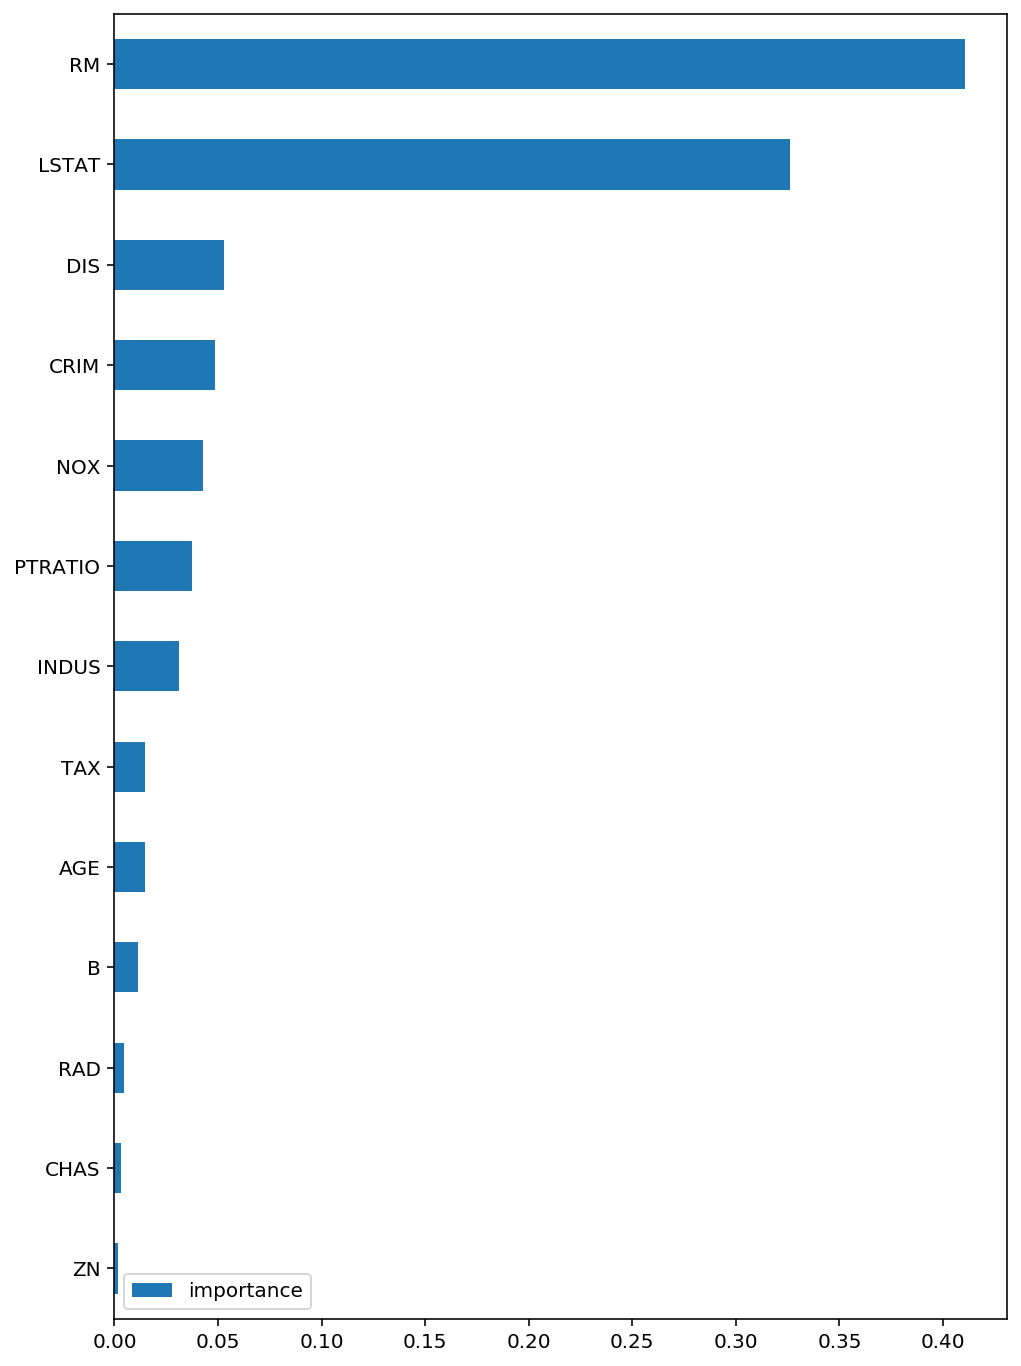

In [13]:
df = feature_importances.iloc[::-1]
df.plot.barh(stacked=True, figsize=(8,12));